[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Loss_function.ipynb)

In [0]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.python.framework import ops
ops.reset_default_graph()
import warnings
warnings.filterwarnings('ignore')

sess= tf.Session()

# Numerical predictions


In [0]:
#Predictions of x values

x_vals = tf.linspace(-1., 1., 500)

target = tf.constant(0.)

In [0]:
# L2 loss 
# (pred - actual)**2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

print(l2_y_out)

[1.00000000e+00 9.92000103e-01 9.84032154e-01 9.76096511e-01
 9.68192935e-01 9.60321426e-01 9.52482104e-01 9.44674969e-01
 9.36899841e-01 9.29156899e-01 9.21446025e-01 9.13767397e-01
 9.06120896e-01 8.98506403e-01 8.90924096e-01 8.83373976e-01
 8.75855863e-01 8.68369997e-01 8.60916257e-01 8.53494525e-01
 8.46105039e-01 8.38747680e-01 8.31422329e-01 8.24129224e-01
 8.16868246e-01 8.09639275e-01 8.02442551e-01 7.95277953e-01
 7.88145423e-01 7.81045079e-01 7.73976862e-01 7.66940653e-01
 7.59936750e-01 7.52964914e-01 7.46025085e-01 7.39117563e-01
 7.32241988e-01 7.25398719e-01 7.18587518e-01 7.11808383e-01
 7.05061436e-01 6.98346555e-01 6.91663861e-01 6.85013294e-01
 6.78394794e-01 6.71808541e-01 6.65254354e-01 6.58732235e-01
 6.52242362e-01 6.45784557e-01 6.39358819e-01 6.32965326e-01
 6.26603961e-01 6.20274603e-01 6.13977432e-01 6.07712448e-01
 6.01479471e-01 5.95278740e-01 5.89110136e-01 5.82973540e-01
 5.76869190e-01 5.70796967e-01 5.64756751e-01 5.58748782e-01
 5.52772939e-01 5.468291

In [0]:
#l1 loss

l1_y_vals = tf.abs(target-x_vals)
l1_y_out = sess.run(l1_y_vals)

In [0]:
#Pseudo huber Loss
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)

# Pseudo-Huber with delta = 0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

# Pseudo-Huber with delta = 5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)


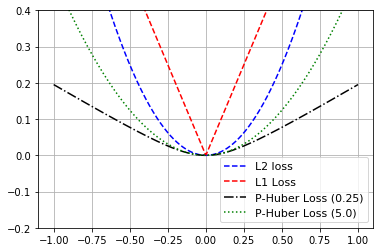

In [0]:
#Plot the losses

x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b--', label = 'L2 loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.grid()
plt.show()

# categorical prediction

In [0]:
x_vals = tf.linspace(-4., 5., 500)

target = tf.constant(1.)
targets = tf.fill([500,],1.)


In [0]:
# Hinge Loss -> max(0, 1-(pred*actual)): considered good for categorical predictions.

hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

In [0]:
# Cross entropy loss -> -actual * (log(pred)) - (1-actual)(log(1-pred))

cross_entropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))

cross_entropy_y_out = sess.run(cross_entropy_y_vals)

In [0]:
#sigmoid entropy loss
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
#tf.expand_dims -> used for adding a dimnesioning value

x_val_input = tf.expand_dims(x_vals,1)
target_input= tf.expand_dims(targets,1)

sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits = x_val_input, labels = target_input)
sigmoid_y_out = sess.run(sigmoid_y_vals)

In [0]:
# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals,
                                                                    targets=targets,
                                                                    pos_weight=weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

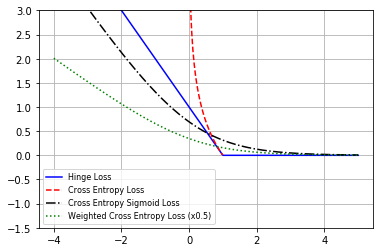

In [0]:
x_array = sess.run(x_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, cross_entropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower left', prop={'size': 8})
plt.grid()
plt.show()

In [0]:
# Softmax entropy loss
# L = -actual * (log(softmax(pred))) - (1-actual)(log(1-softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=unscaled_logits,
                                                              labels=target_dist)
print(sess.run(softmax_xentropy))

# Sparse entropy loss
# Use when classes and targets have to be mutually exclusive
# L = sum( -actual * log(pred) )
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy =  tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                                  labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[1.1601256]
[0.00012564]
